In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_scatter_density 
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/M67-result.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   source_id              5986 non-null   int64  
 1   ra                     5986 non-null   float64
 2   ra_error               5986 non-null   float64
 3   dec                    5986 non-null   float64
 4   dec_error              5986 non-null   float64
 5   parallax               5142 non-null   float64
 6   parallax_error         5142 non-null   float64
 7   pmra                   5142 non-null   float64
 8   pmdec                  5142 non-null   float64
 9   phot_g_mean_mag        5986 non-null   float64
 10  bp_rp                  5464 non-null   float64
 11  bp_g                   5466 non-null   float64
 12  g_rp                   5464 non-null   float64
 13  radial_velocity        141 non-null    float64
 14  radial_velocity_error  141 non-null    float64
 15  phot

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
source_id,5986.0,6.039874e+17,2.179583e+15,5.986950e+17,6.048916e+17,6.049179e+17,6.049639e+17,6.050173e+17
ra,5986.0,1.328467e+02,2.379294e-01,1.323404e+02,1.326658e+02,1.328457e+02,1.330230e+02,1.333547e+02
ra_error,5986.0,1.474623e+00,4.593964e+00,1.781003e-02,7.073426e-02,2.723411e-01,7.391915e-01,8.371092e+01
dec,5986.0,1.181241e+01,2.353044e-01,1.131711e+01,1.163537e+01,1.181083e+01,1.199149e+01,1.231065e+01
dec_error,5986.0,7.536213e-01,1.852615e+00,1.196324e-02,4.624589e-02,1.823242e-01,4.873428e-01,2.530972e+01
parallax,5142.0,1.003298e+00,1.241948e+00,-6.584126e+00,4.272409e-01,1.013431e+00,1.280420e+00,2.203723e+01
parallax_error,5142.0,4.231659e-01,4.630105e-01,2.081667e-02,7.131885e-02,2.486641e-01,6.273561e-01,2.980339e+00
pmra,5142.0,-5.464375e+00,1.035483e+01,-2.290634e+02,-1.090767e+01,-5.006750e+00,-5.941609e-01,1.631548e+02
pmdec,5142.0,-4.860967e+00,1.141109e+01,-3.880270e+02,-5.422183e+00,-2.992966e+00,-1.465078e+00,4.963247e+01
phot_g_mean_mag,5986.0,1.822093e+01,2.521818e+00,7.521748e+00,1.660180e+01,1.893566e+01,2.026797e+01,2.151296e+01


In [5]:
# deghat bere bala
# 22k missing data removed
df = df[df['phot_g_mean_mag'] < 18]

In [6]:
len(df)

2294

In [7]:
hot = LinearSegmentedColormap.from_list('hot', 
    [
    (0, '#ffffff'),
    (1e-10, '#0B0000'),
    (0.15, '#720000'),
    (0.3, '#DB0000'),
    (0.45, '#FF4500'),
    (0.6, '#FFAE00'),
    (0.75, '#FFFF24'),
    (0.9, '#FFFFAC'),
    (1, "#ffffff")
    ], N=6565)

def using_mpl_scatter_density(fig, df, G_col):
    
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(df['bp_rp'], df[G_col], cmap=hot, )
    fig.colorbar(density, label='Number of points per pixel')
    ax.set_xlabel('$ G _{bp-rp} $')
    ax.set_ylabel('$ M_{G} $')
#     ax.set_ylim(20,-10)

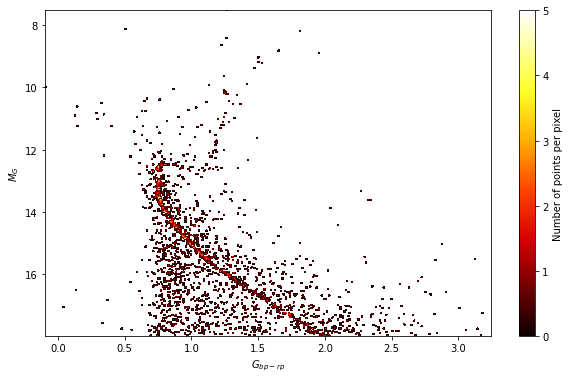

In [8]:
fig = plt.figure(figsize=(10,6))
using_mpl_scatter_density(fig, df, G_col='phot_g_mean_mag')
plt.gca().invert_yaxis()

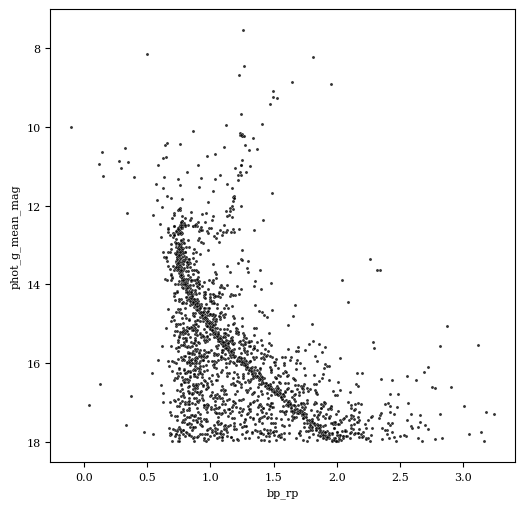

In [11]:
with plt.style.context(['ieee']):
    fig = plt.figure(figsize=(6,6), dpi=100)
    sns.scatterplot(data=df, y=df['phot_g_mean_mag'], x='bp_rp', alpha=0.8, s=5, )
    plt.gca().invert_yaxis()

In [12]:
df['Gmg'] = df['phot_g_mean_mag'] + (5 * np.log10(abs(df['parallax'])) - 10)
# df['Gbp_rp'] = df['bp_rp'] + (5 * np.log10(abs(df['parallax'])) - 10)

In [13]:
df[['phot_g_mean_mag', 'Gmg', 'bp_rp', 'bp_rp']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
phot_g_mean_mag,2294.0,15.512426,1.835323,7.521748,14.264233,15.823546,17.070758,17.997396
Gmg,2273.0,5.324385,2.109137,-8.049297,3.912187,5.265169,6.784797,12.606979
bp_rp,2271.0,1.185470,0.463485,-0.098594,0.831660,1.045584,1.434135,3.244581
bp_rp,2271.0,1.185470,0.463485,-0.098594,0.831660,1.045584,1.434135,3.244581


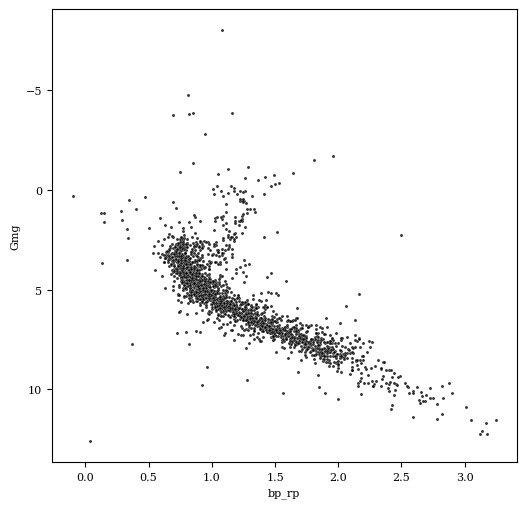

In [16]:
with plt.style.context(['ieee']):
    fig = plt.figure(figsize=(6,6), dpi=100)
    sns.scatterplot(data=df, y=df['Gmg'], x='bp_rp', alpha=0.8, s=5, )
    plt.gca().invert_yaxis()

<AxesSubplot:xlabel='phot_g_mean_mag', ylabel='Count'>

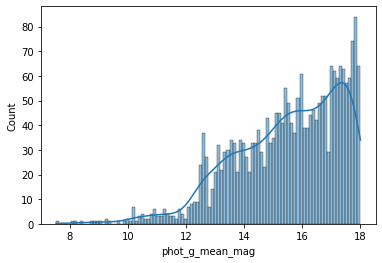

In [17]:
sns.histplot(data=df['phot_g_mean_mag'], kde=True, bins=100)

<AxesSubplot:xlabel='Gmg', ylabel='Count'>

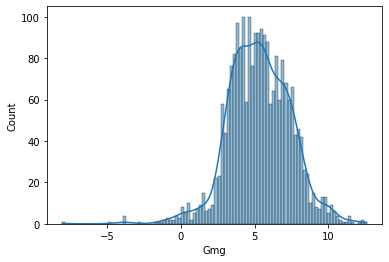

In [18]:
sns.histplot(data=df['Gmg'], kde=True, bins=100)

<AxesSubplot:xlabel='pmra', ylabel='Count'>

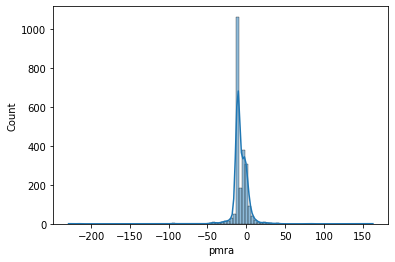

In [19]:
sns.histplot(data=df['pmra'], kde=True, bins=100)
# sns.histplot(data=df['pmdec'], kde=True, bins=100)

In [20]:
df[['ra', 'dec']].describe()

,ra,dec
count,2294.000000,2294.000000
mean,132.847773,11.817490
std,0.219416,0.219913
min,132.340827,11.317111
25%,132.695962,11.662229
50%,132.845528,11.814953
75%,132.995592,11.976911
max,133.352428,12.302884


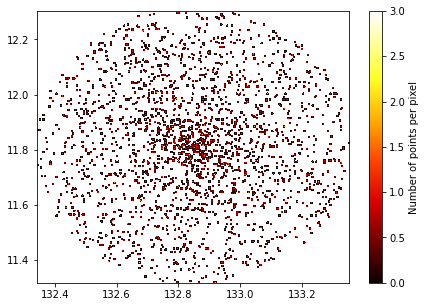

In [21]:
fig = plt.figure(figsize=(7, 5))

ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(df['ra'], df['dec'], cmap=hot)
fig.colorbar(density, label='Number of points per pixel')

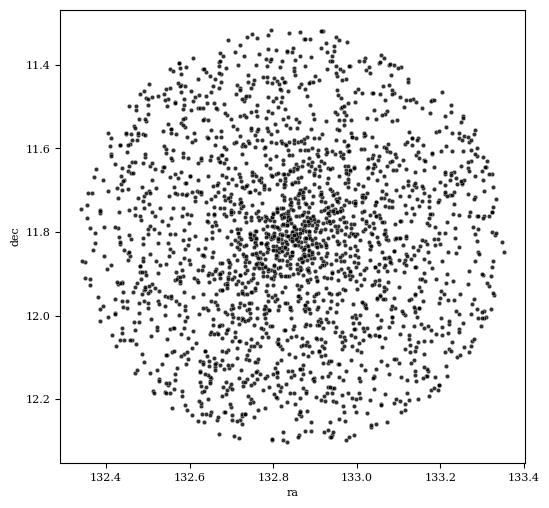

In [24]:
with plt.style.context(['ieee']):
    fig = plt.figure(figsize=(6,6), dpi=100)
    sns.scatterplot(data=df, y='dec', x='ra', alpha=0.8, s=10 )
    plt.gca().invert_yaxis()

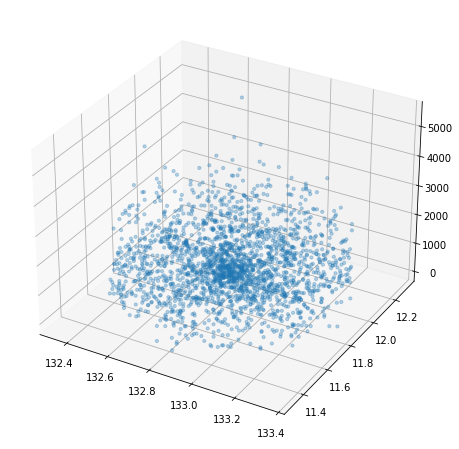

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(df['ra'], df['dec'], df['r_est'], s=10, alpha=0.3)
plt.show()

In [26]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler

In [42]:
newdf = df.drop(['phot_variable_flag', 'source_id', 'l', 'b', 'dec_error', 'parallax_error', 
                               'bp_g', 'g_rp', 'ra_error',
                               'radial_velocity', 'radial_velocity_error', 
                               'teff_val', 'a_g_val', 'r_lo','r_hi','r_len'], axis=1).dropna(axis=0)

newdf

,ra,dec,parallax,pmra,pmdec,phot_g_mean_mag,bp_rp,r_est,Gmg
13,132.946529,11.353877,1.233891,-10.911429,-3.123880,17.438314,2.049427,792.316386,7.894698
16,132.877356,11.402508,2.566677,12.567287,-4.509875,17.658459,2.281569,386.455909,9.705315
19,132.846039,11.369141,1.077097,-4.924743,-0.596913,16.780655,1.052814,889.031932,6.941928
22,132.863393,11.378411,1.938177,13.820831,-16.828043,15.903109,1.521093,508.671228,7.340076
25,132.944486,11.365818,0.296721,-0.713121,-3.710886,17.114708,0.949881,2357.342263,4.476450
...,...,...,...,...,...,...,...,...,...
5977,132.631541,11.881049,1.358381,2.589505,-7.722464,16.674145,1.483350,721.300569,7.339254
5982,132.811315,12.056513,0.564210,-0.425948,-8.033232,17.706045,1.447361,1545.759143,6.463250
5983,132.806593,11.618136,0.420551,1.978282,-4.142061,15.568574,1.047923,2138.412920,3.687669
5984,132.982076,11.605403,0.152736,-12.746013,-10.568876,17.899590,0.862976,2291.144649,3.819291


In [43]:
X = newdf[['ra','dec', 'r_est']]
X = newdf.dropna(axis=0)

### PM

<AxesSubplot:xlabel='pmra', ylabel='Count'>

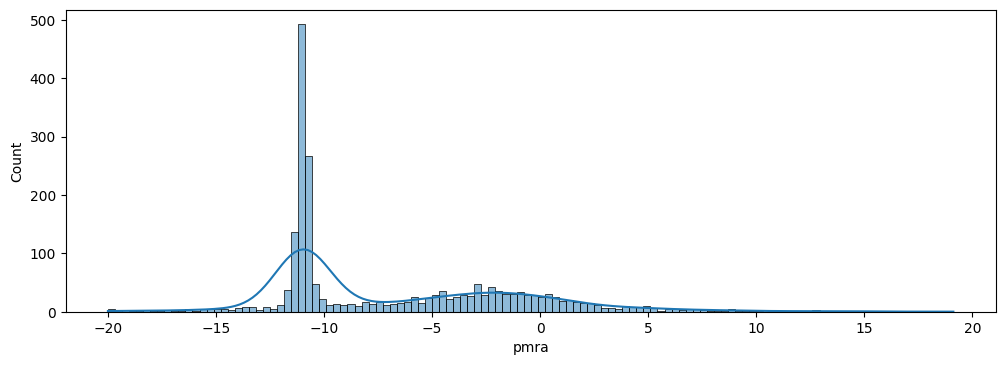

In [44]:
data = newdf[abs(newdf['pmra']) < 20]
data = data[abs(data['pmdec']) < 20]

plt.figure(figsize=(12,4), dpi=100)

sns.histplot(data=data, x='pmra', bins=120 , kde=True)

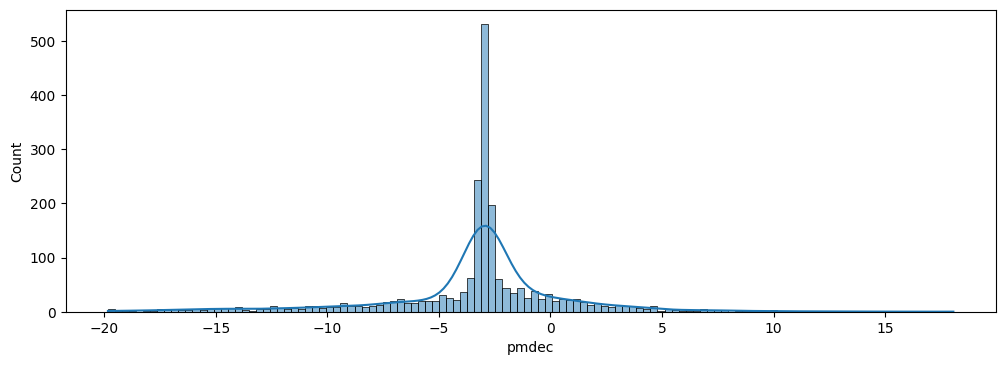

In [45]:
plt.figure(figsize=(12,4), dpi=100)

sns.histplot(data=data, x='pmdec', bins=120 , kde=True);

In [46]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=0)

In [47]:
ypred = gm.fit_predict(data[['pmra', 'pmdec']])
ypred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [48]:
data['label'] = ypred

In [49]:
len(data[data['label'] == 0])

922

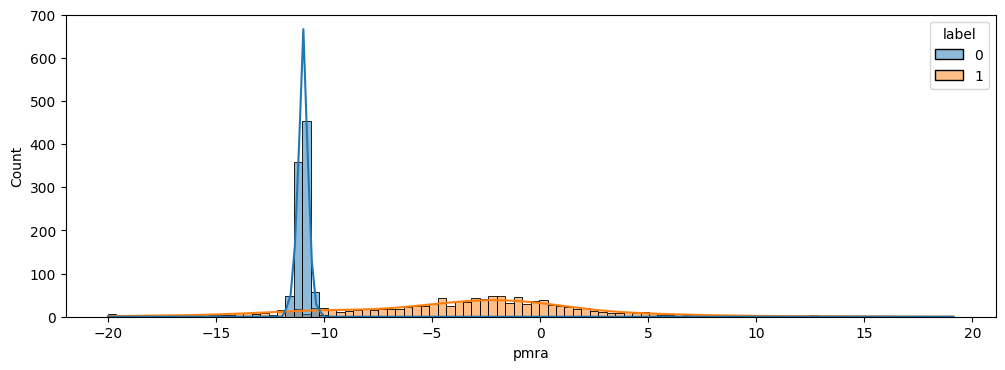

In [50]:
plt.figure(figsize=(12,4), dpi=100)

# data = newdf[abs(newdf['pmra']) < 25]
# sns.kdeplot(data=newdf[abs(newdf['pmra']) < 25], x='pmra')
sns.histplot(data=data, x='pmra', bins=100 , kde=True, hue='label');

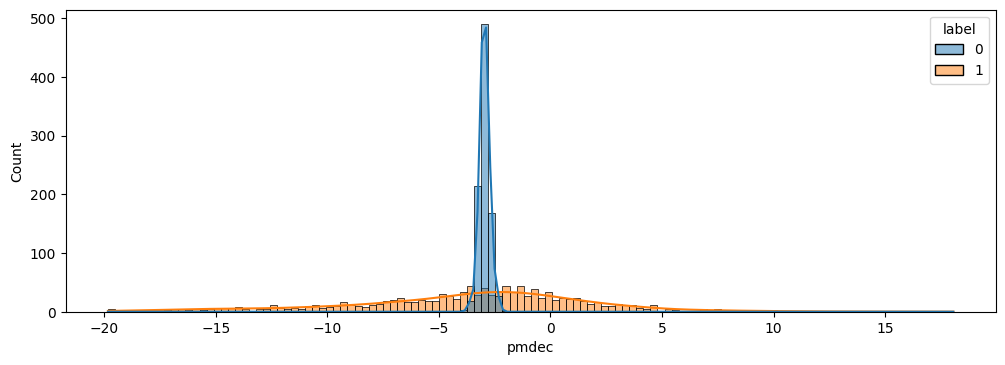

In [51]:
plt.figure(figsize=(12,4), dpi=100)

# sns.kdeplot(data=newdf[abs(newdf['pmdec']) < 20], x='pmdec')
sns.histplot(data=data, x='pmdec', bins=120 , kde=True, hue='label');

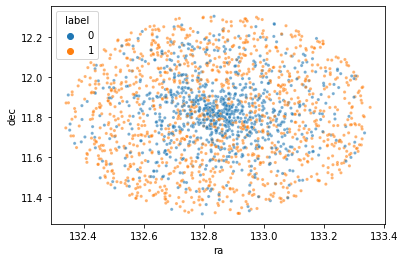

In [52]:
sns.scatterplot(data = data, x = 'ra', y='dec', alpha=0.6, s=10, hue='label');

In [53]:
data['label'].value_counts()

1    1176
0     922
Name: label, dtype: int64

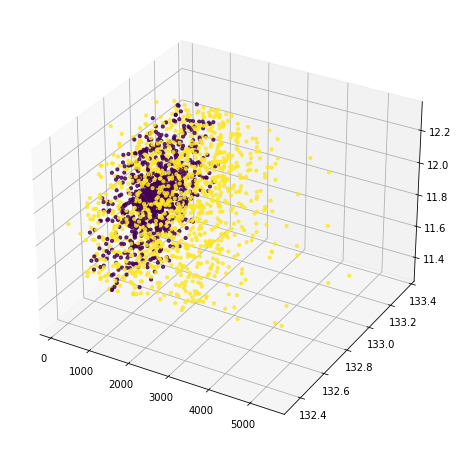

In [54]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(data['r_est'],data['ra'],data['dec'], s=10, alpha=0.8, c=data['label'])
plt.show()

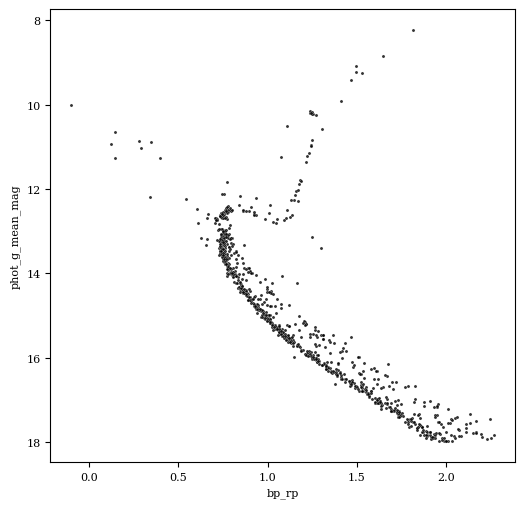

In [57]:
with plt.style.context(['ieee']):
    fig = plt.figure(figsize=(6,6), dpi=100)
    sns.scatterplot(data=data[data['label'] == 0], y=data['phot_g_mean_mag'], x='bp_rp', alpha=0.8, s=5, )
    plt.gca().invert_yaxis()

In [59]:
# filter proper motion
bg_data = data[data['label'] == 1]
m67_data =  data[(data['pmra'] > -11.2) & (-10.7 > data['pmra']) & (data['pmdec'] > -3.3) & (-2.6 > data['pmra']) & (data['label'] == 0)]

data = pd.concat([bg_data, m67_data], axis=0)

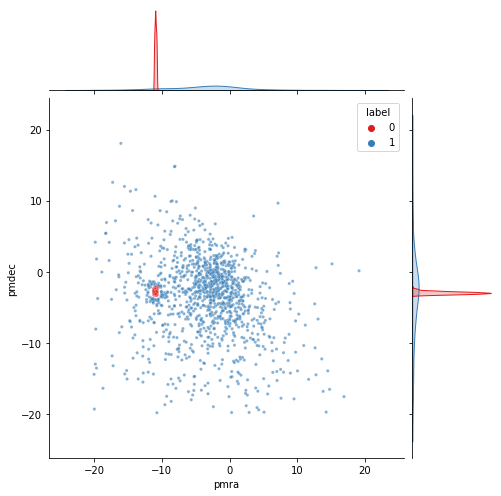

In [60]:
sns.jointplot(x='pmra', y='pmdec', data=data, palette='Set1', kind='scatter', hue='label', s=10, alpha=0.6,
              height=7, ratio=4, space=0.1);

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [62]:
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [63]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

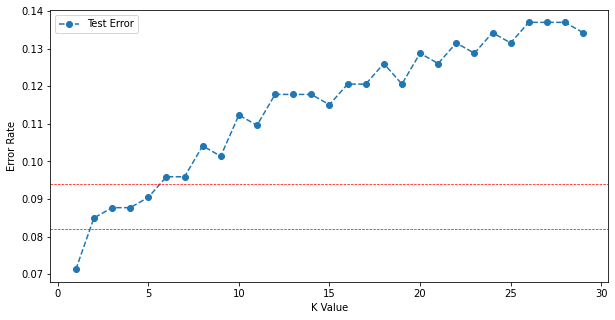

In [64]:
test_errors = []

for i in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    
    err = 1 - accuracy_score(y_test, y_pred)
    test_errors.append(err)
    
plt.figure(figsize=(10,5))
plt.plot(range(1,30),test_errors,'--o',label='Test Error')

plt.axhline(y=0.082, color='red', ls='--', lw=0.7)
plt.axhline(y=0.094, color='red', ls='--', lw=0.7)

plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value");

In [65]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report

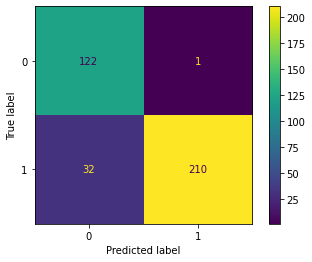

In [67]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot();

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       123
           1       1.00      0.87      0.93       242

    accuracy                           0.91       365
   macro avg       0.89      0.93      0.90       365
weighted avg       0.93      0.91      0.91       365



### save model 

In [69]:
import joblib
joblib.dump(knn_model, 'knn_model.joblib')

['knn_model.joblib']

### import after training on NGC 188

In [70]:
knn_model = joblib.load('knn_model.joblib')

### evaluate on M45

In [71]:
df = pd.read_csv('../data/M45-result.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91301 entries, 0 to 91300
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   source_id              91301 non-null  int64  
 1   ra                     91301 non-null  float64
 2   ra_error               91301 non-null  float64
 3   dec                    91301 non-null  float64
 4   dec_error              91301 non-null  float64
 5   parallax               78675 non-null  float64
 6   parallax_error         78675 non-null  float64
 7   pmra                   78675 non-null  float64
 8   pmdec                  78675 non-null  float64
 9   phot_g_mean_mag        91301 non-null  float64
 10  bp_rp                  84362 non-null  float64
 11  bp_g                   84365 non-null  float64
 12  g_rp                   84375 non-null  float64
 13  radial_velocity        1402 non-null   float64
 14  radial_velocity_error  1402 non-null   float64
 15  ph

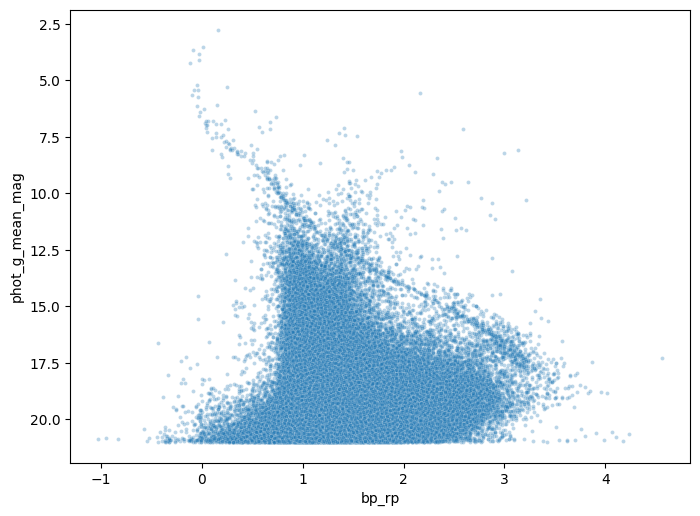

In [185]:
fig = plt.figure(figsize=(8,6), dpi=100)
sns.scatterplot(data=df, y=df['phot_g_mean_mag'], x='bp_rp', alpha=0.3, s=8)
plt.gca().invert_yaxis()

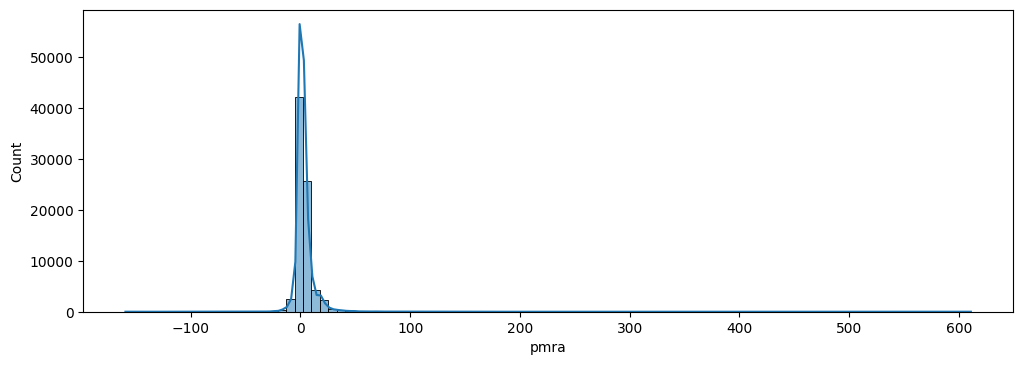

In [186]:
plt.figure(figsize=(12,4), dpi=100)

sns.histplot(data=df, x='pmra', bins=100 , kde=True,);
# sns.histplot(data=df, x='pmdec', bins=100 , kde=True, color='red');

In [187]:
df['Gmg'] = df['phot_g_mean_mag'] + (5 * np.log10(abs(df['parallax'])) - 10)
df = df[df['phot_g_mean_mag'] < 20]
newdf = df[['ra','dec','parallax','pmra','pmdec','bp_rp','r_est','Gmg']].dropna(axis=0)
newdf = newdf[abs(newdf['pmra']) < 15]
newdf = newdf[abs(newdf['pmdec']) < 15]

In [188]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52329 entries, 0 to 91300
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        52329 non-null  float64
 1   dec       52329 non-null  float64
 2   parallax  52329 non-null  float64
 3   pmra      52329 non-null  float64
 4   pmdec     52329 non-null  float64
 5   bp_rp     52329 non-null  float64
 6   r_est     52329 non-null  float64
 7   Gmg       52329 non-null  float64
dtypes: float64(8)
memory usage: 3.6 MB


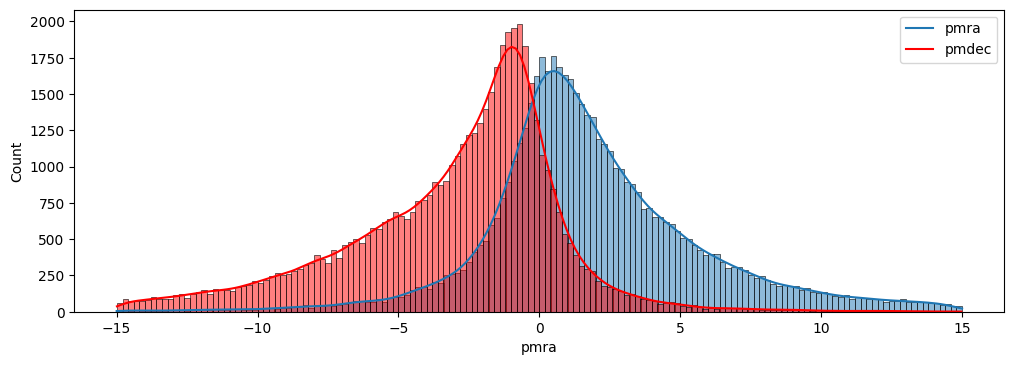

In [189]:
plt.figure(figsize=(12,4), dpi=100)

sns.histplot(data=newdf, x='pmra', bins=150 , kde=True,)
sns.histplot(data=newdf, x='pmdec', bins=150 , kde=True, color='red')
plt.legend(['pmra', 'pmdec']);

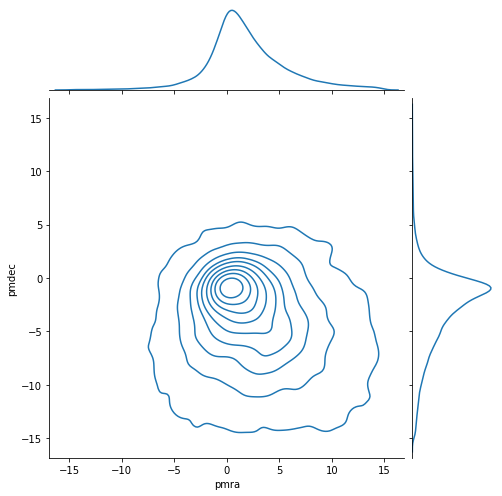

In [190]:
sns.jointplot(x='pmra', y='pmdec', data=newdf, palette='Set1', kind='kde', s=16, height=7, ratio=4, space=0.1);

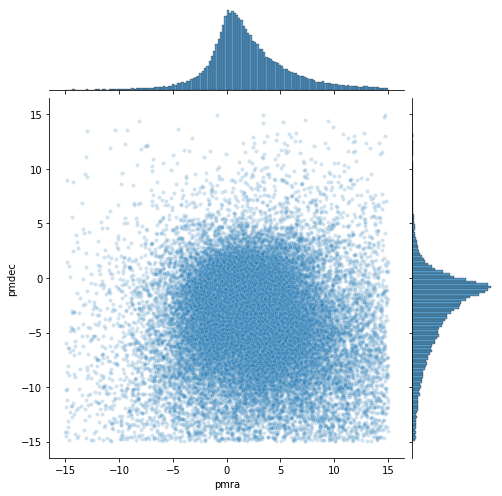

In [191]:
sns.jointplot(x='pmra', y='pmdec', data=newdf, palette='Set1', kind='scatter', s=16, height=7, ratio=4, space=0.1, alpha=0.2);

In [192]:
gm = GaussianMixture(n_components=2, random_state=101)
y_pred = gm.fit_predict(newdf[['pmra', 'pmdec']])
newdf['label'] = y_pred

In [193]:
print((y_pred == 0).sum(), 
     (y_pred == 1).sum())

27714 24615


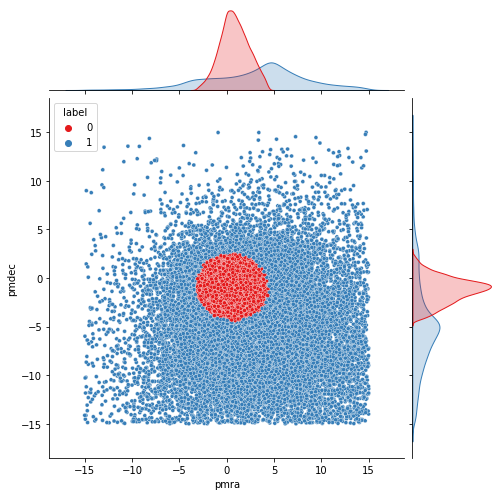

In [194]:
sns.jointplot(x='pmra', y='pmdec', data=newdf, palette='Set1', kind='scatter', hue='label',
              s=16, height=7, ratio=4, space=0.1);

In [195]:
newdf = newdf[newdf['label'] == 0]

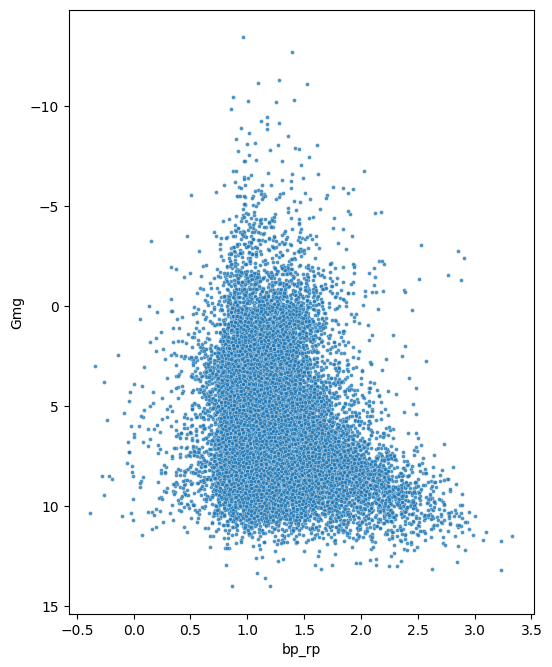

In [196]:
fig = plt.figure(figsize=(6,8), dpi=100)
sns.scatterplot(data=newdf, y='Gmg', x='bp_rp', alpha=0.8, s=8)
plt.gca().invert_yaxis()

In [198]:
X = newdf.drop('label', axis=1)
y = newdf['label']

X_train, X_test, y_train, y_test = train_test_split(newdf, y, test_size=0.2, random_state=101)

In [199]:
X.shape

(27714, 8)

In [200]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [201]:
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [218]:
plt.figure(figsize=(12,4), dpi=100)

sns.histplot(data=X_test, x=X[:, 3], bins=100 , kde=True);
# sns.histplot(data=df, x='pmdec', bins=100 , kde=True, color='red');

TypeError: '(slice(None, None, None), 3)' is an invalid key

<Figure size 1200x400 with 0 Axes>

In [110]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}